In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import interpolate

In [2]:
file_loc = '2M1310_DEIMOS_spectra/*'

In [3]:
spec2d_det2 = []
spec2d_det6 = []

for fl in glob.glob(file_loc):
    if 'clean' in fl:
        if 'det2' in fl:
            spec2d_det2.append(fl)
        elif 'det6' in fl:
            spec2d_det6.append(fl)

In [4]:
spec2d_det2 = sorted(spec2d_det2)
spec2d_det6 = sorted(spec2d_det6)
spec2d_det2, spec2d_det6

(['2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0074_clean.fits',
  '2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0075_clean.fits',
  '2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0614_0075_clean.fits'],
 ['2M1310_DEIMOS_spectra/2M1310_deimos_det6_d0613_0074_clean.fits',
  '2M1310_DEIMOS_spectra/2M1310_deimos_det6_d0613_0075_clean.fits',
  '2M1310_DEIMOS_spectra/2M1310_deimos_det6_d0614_0075_clean.fits'])

In [46]:
spec10 = spec2d.Spec2d(spec2d_det2[0], hext=1, varext=2, ytrim=[0, 1450])
spec11 = spec2d.Spec2d(spec2d_det2[0], hext=1, varext=2, ytrim=[1300, 4096])


Loading file 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0074_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0074_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:104.  yrange: 0:1451
Final data dimensions (x y): 104 x 1451

Dispersion axis:              x
N_pixels along dispersion axis: 104


Loading file 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0074_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0074_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:104.  yrange: 1300:4097
Final data dimensions (x y): 104 x 2796

Dispersion axis:              x
N_pixels along dispersion axis: 104



In [47]:
spec10.set_dispaxis('y')
spec11.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 1451



Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 2796




### Before rectification the wavelength 2d data are vastly tilted which could also be seen from skymodel data. So wave rectification is necessary.

In [7]:
wav2d = pf.open(spec2d_det2[0])[4]

In [8]:
wav2d.data

array([[4941.34264001, 4940.93063313, 4940.52471272, ..., 4907.0554194 ,
        4906.54915798, 4906.03482238],
       [4941.9521638 , 4941.54032085, 4941.13454773, ..., 4907.66052446,
        4907.15465542, 4906.64073368],
       [4942.5617012 , 4942.1500219 , 4941.74439583, ..., 4908.26565002,
        4907.76017276, 4907.24666423],
       ...,
       [7525.70008249, 7525.33581538, 7524.97238188, ..., 7490.01334349,
        7489.63918157, 7489.26397213],
       [7526.34601621, 7525.98169045, 7525.61820392, ..., 7490.66099086,
        7490.28671015, 7489.911375  ],
       [7526.99195244, 7526.62756788, 7526.26402815, ..., 7491.30864505,
        7490.93424521, 7490.558784  ]])

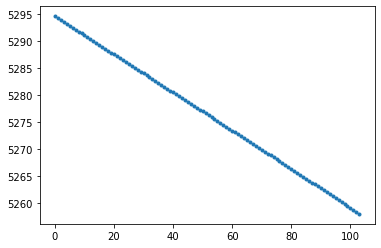

In [9]:
plt.plot(np.arange(wav2d.data.shape[1]), wav2d.data[np.random.randint(0, 4096)], '.')

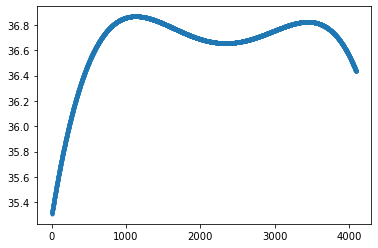

In [10]:
plt.plot(np.arange(4096), np.max(wav2d.data, axis=1)-np.min(wav2d.data, axis=1), '.')

Dispersion : 0.620000
Found 3136 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image
Dispersion : 0.640000
Found 3058 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


<Figure size 432x288 with 0 Axes>

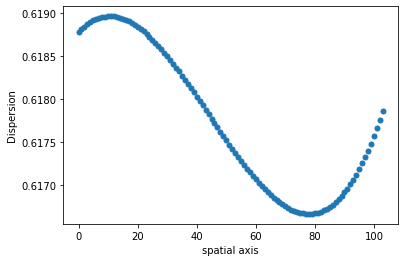

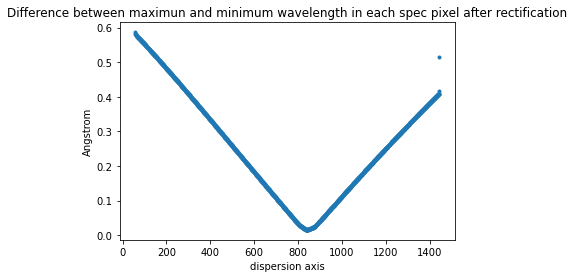

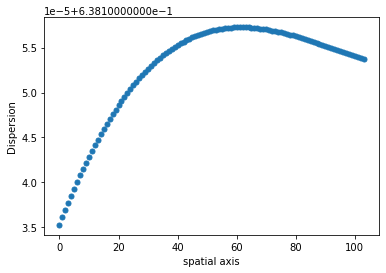

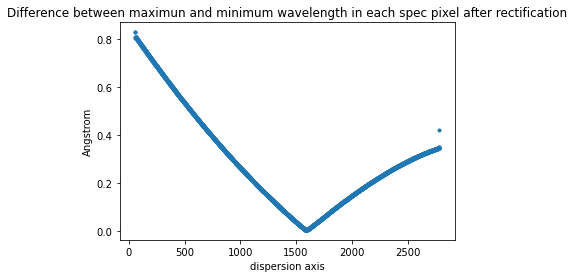

<Figure size 432x288 with 0 Axes>

In [48]:
spec10.do_waverect(doplot=True, resamp_ord=3)
plt.figure()
spec11.do_waverect(doplot=True, resamp_ord=3)
plt.figure()

### After rectification

In [12]:
spec10.new_wav2d.shape

(1451, 104)

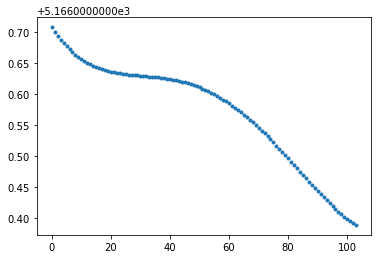

In [13]:
plt.plot(np.arange(spec10.new_wav2d.shape[1]),
         spec10.new_wav2d[np.random.randint(0, spec10.new_wav2d.shape[0])], '.')

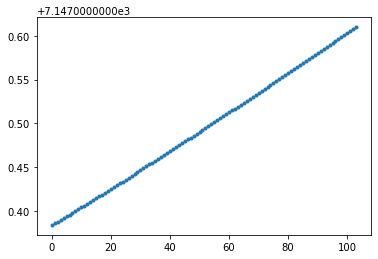

In [14]:
plt.plot(np.arange(spec11.new_wav2d.shape[1]),
         spec11.new_wav2d[np.random.randint(0, spec11.new_wav2d.shape[0])], '.')

Profile max value (before normalization) 53.765926


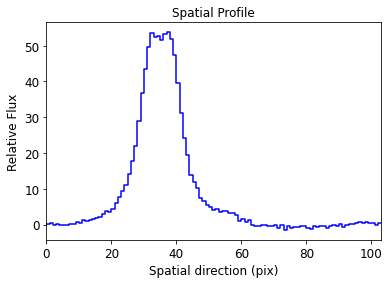

In [15]:
profile10 = spec10.spatial_profile(pixrange=[500, 900])

### Slit only covers the two deflectors in the middle. Though don't know what is the slit position it seems 0.75 arcsecond distance between two peaks works.


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 48, 31, 3, 4

amplitude=48.000000, x_0=31.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 52, 39, 3, 4

amplitude=52.000000, x_0=39.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.74955077)>

    [1]: <Moffat1D(amplitude=40.65585917, x_0=32.67142086, gamma=5.52756679, alpha=1.48704297)>

    [2]: <Moffat1D(amplitude=41.50570921, x_0=38.9639763, g

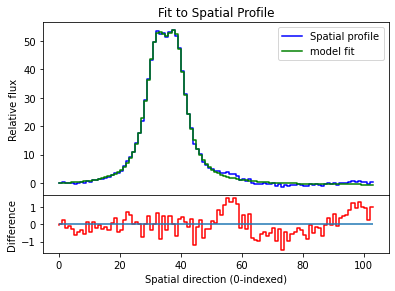

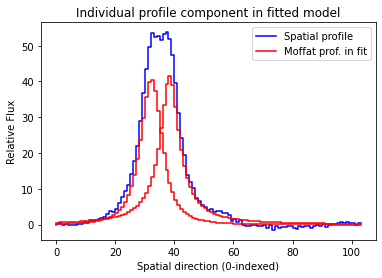


Do you want to start over ? : type yes/no
no


In [16]:
# This is for frame d0613_0074 bluer side part
mod10 = spec10.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.74955077)>

    [1]: <Moffat1D(amplitude=40.65585917, x_0=32.67142086, gamma=5.52756679, alpha=1.48704297)>

    [2]: <Moffat1D(amplitude=41.50570921, x_0=38.9639763, gamma=3.84590828, alpha=0.9321895)>
Parameters:
            c0_0           amplitude_1    ...      gamma_2           alpha_2     
    ------------------- ----------------- ... ----------------- -----------------
    -0.7495507720532815 40.65585916668068 ... 3.845908284236377 0.932189499158815

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.66293401)>

    [1]: <Moffat1D(amplitude=40.51197689, x_0=32.5379641, gamma=4.53517695, alpha=1.144783)>

    [2]: <Moffat1D(amplitude=41.49620563, x_

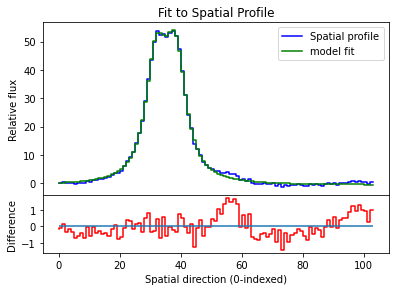

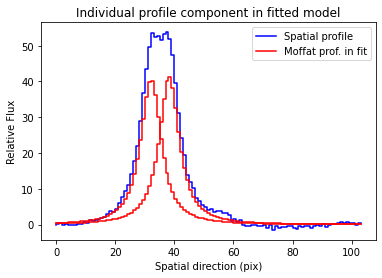

In [17]:
# this is for frame  d0613_0074
def tie_pos1_moffat(model):
     return model.x_0_1 + (0.74/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.06/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec10.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec10.mod0[2].gamma.tied = tie_gamma_moffat
spec10.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec10.refined_model(mod10)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 96 segments
  of the 2D spectrum with stepsize=15 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


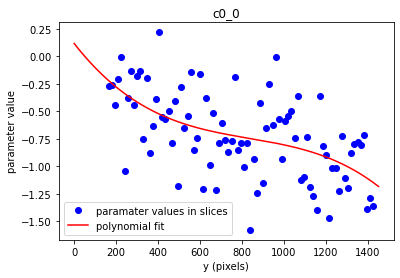

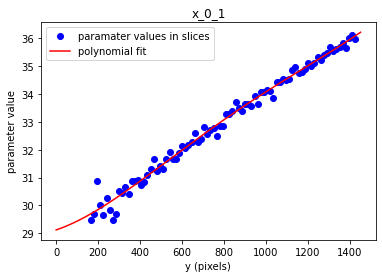

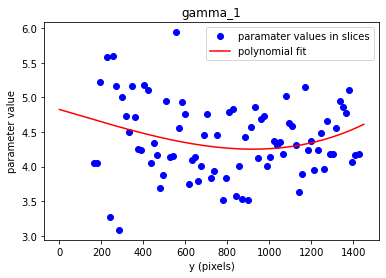

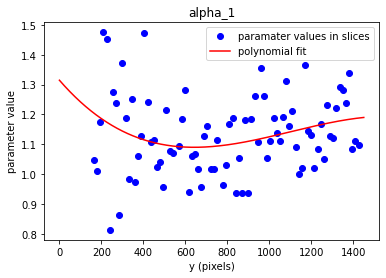

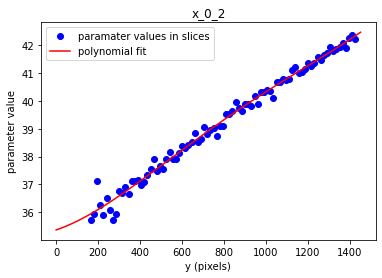

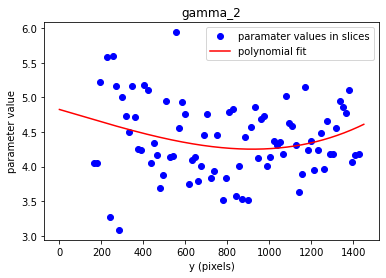

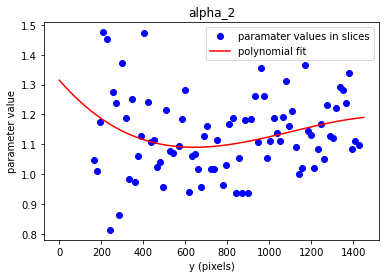

In [18]:
spec10.find_and_trace(spec10.mod0, stepsize=15, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                    fitrange=[160, -1], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 150 - 1451
Fitting to the trace at 1451 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62

 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62


Plotting the spectrum


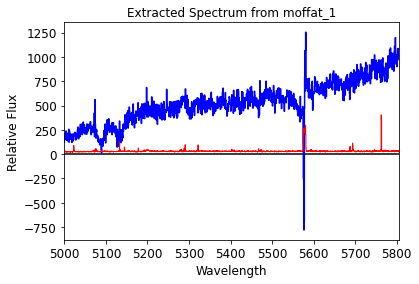

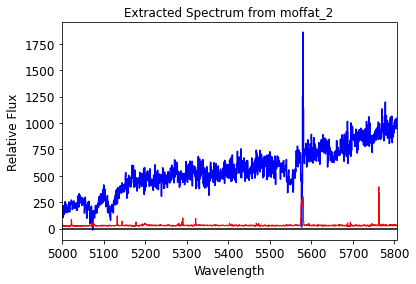

In [19]:
spec10.extract(method='modelfit', extrange=[150, -1])

In [20]:
spec10.spectra[0][1].save('spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_1.fits', outformat='fits')
spec10.spectra[1][1].save('spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_2.fits', outformat='fits')

Saved spectrum to file spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_1.fits in format fits
Saved spectrum to file spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_2.fits in format fits


Profile max value (before normalization) 160.491547


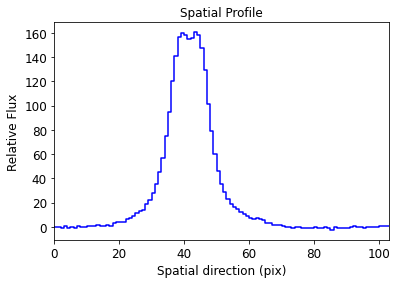

In [49]:
profile11 = spec11.spatial_profile(pixrange=[700, 1100])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 155, 39, 3, 4

amplitude=155.000000, x_0=39.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 154, 47, 3, 4

amplitude=154.000000, x_0=47.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.59020927)>

    [1]: <Moffat1D(amplitude=126.36816206, x_0=39.18033933, gamma=5.11900018, alpha=1.37488407)>

    [2]: <Moffat1D(amplitude=122.11087508, x_0=45.4038

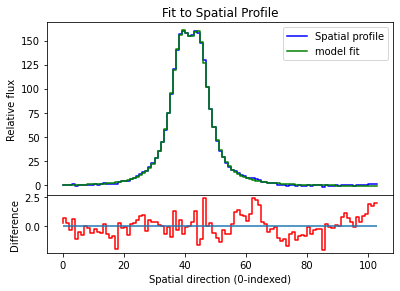

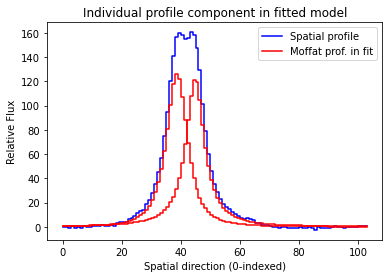


Do you want to start over ? : type yes/no
no


In [50]:
# This is for frame d0613_0074 redder side part
mod11 = spec11.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.59020927)>

    [1]: <Moffat1D(amplitude=126.36816206, x_0=39.18033933, gamma=5.11900018, alpha=1.37488407)>

    [2]: <Moffat1D(amplitude=122.11087508, x_0=45.40386741, gamma=4.04470992, alpha=1.08181471)>
Parameters:
            c0_0           amplitude_1     ...      alpha_2      
    ------------------- ------------------ ... ------------------
    -1.5902092651729163 126.36816206011098 ... 1.0818147085691465

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.4985283)>

    [1]: <Moffat1D(amplitude=124.03764132, x_0=39.00895295, gamma=4.55993956, alpha=1.22257699)>

    [2]: <Moffat1D(amplitude=124.85862008, x_0=45.25367868, gamma=4.55993956, alpha=1

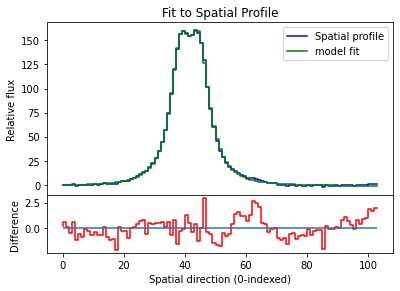

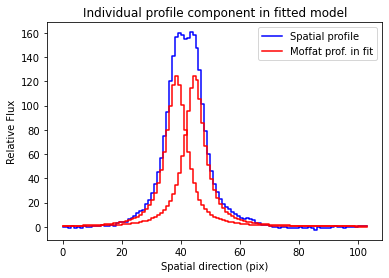

In [51]:
# this is for frame  d0613_0074 redder side part
def tie_pos1_moffat(model):
     return model.x_0_1 + (0.74/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec11.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec11.mod0[2].gamma.tied = tie_gamma_moffat
spec11.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec11.refined_model(mod11)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 139 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


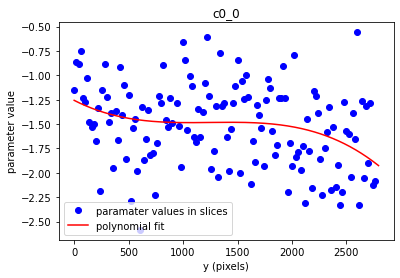

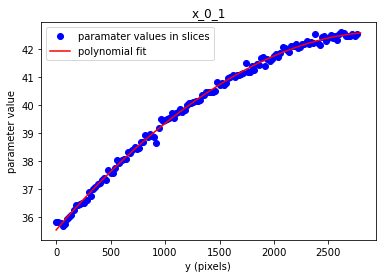

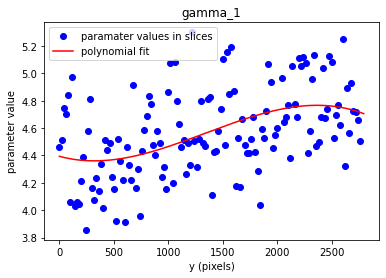

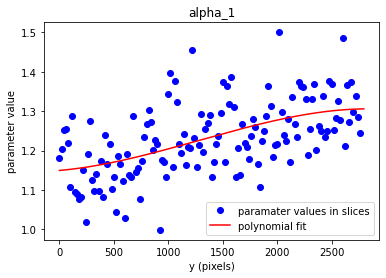

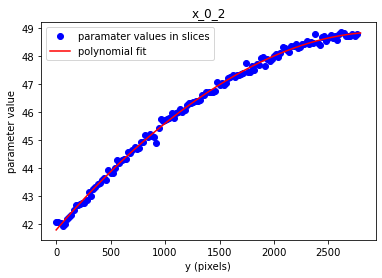

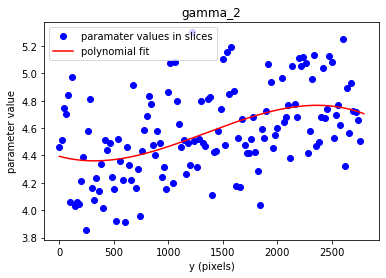

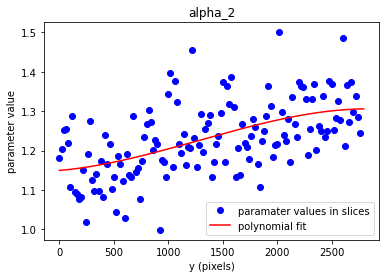

In [52]:
spec11.find_and_trace(spec11.mod0, stepsize=20, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                    fitrange=[0, -1], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 50 - 2796
Fitting to the trace at 2796 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5739.98
 Spectrum End:     7496.29
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.64

 Spectrum Start:  5739.98
 Spectrum End:     7496.29
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.64


Plotting the spectrum


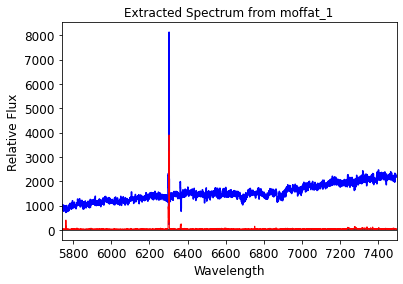

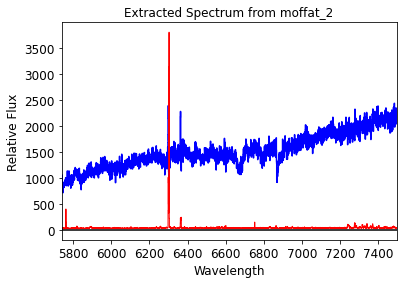

In [53]:
spec11.extract(method='modelfit', extrange=[50, -1])

In [60]:
spd = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_1.fits',
                   informat='fits')
spd2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_2.fits',
                   informat='fits')


Reading spectrum from 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_1.fits
Expected file format: fits
 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62


Reading spectrum from 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_2.fits
Expected file format: fits
 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62



(-50.0, 4000.0)

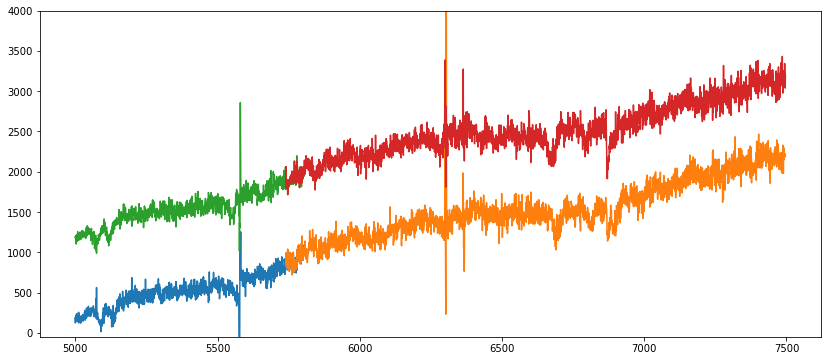

In [63]:
plt.figure(figsize=(14, 6))
plt.plot(spd['wav'], spd['flux'])
plt.plot(spec11.spectra[0][1]['wav'], spec11.spectra[0][1]['flux'])
plt.plot(spd2['wav'], spd2['flux']+1000)
plt.plot(spec11.spectra[1][1]['wav'], spec11.spectra[1][1]['flux']+1000)
plt.ylim(-50, 4000)

In [64]:
spec11.spectra[0][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_1.fits',
                          outformat='fits')
spec11.spectra[1][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_2.fits',
                          outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_1.fits in format fits
Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_2.fits in format fits


In [65]:
spec20 = spec2d.Spec2d(spec2d_det2[1], hext=1, varext=2, ytrim=[0, 1450])
spec21 = spec2d.Spec2d(spec2d_det2[1], hext=1, varext=2, ytrim=[1300, 4096])


Loading file 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0075_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0075_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:104.  yrange: 0:1451
Final data dimensions (x y): 104 x 1451

Dispersion axis:              x
N_pixels along dispersion axis: 104


Loading file 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0075_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0613_0075_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:104.  yrange: 1300:4097
Final data dimensions (x y): 104 x 2796

Dispersion axis:              x
N_pixels along dispersion axis: 104



In [66]:
spec20.set_dispaxis('y')
spec21.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 1451



Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 2796




Dispersion : 0.620000
Found 3136 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image
Dispersion : 0.640000
Found 3058 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


<Figure size 432x288 with 0 Axes>

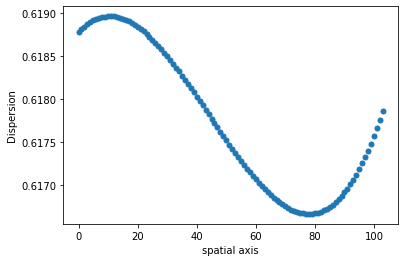

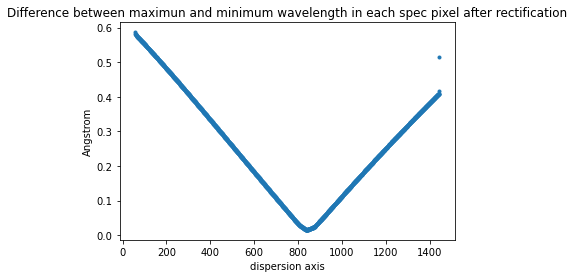

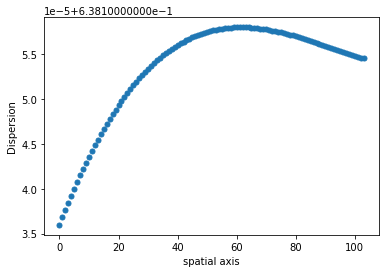

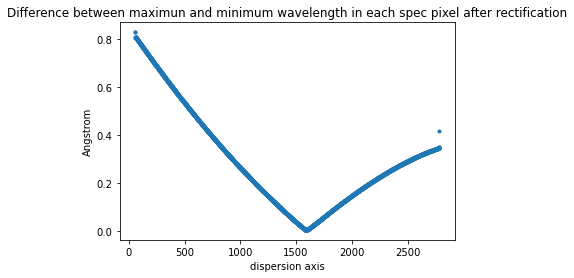

<Figure size 432x288 with 0 Axes>

In [67]:
spec20.do_waverect(doplot=True, resamp_ord=3)
plt.figure()
spec21.do_waverect(doplot=True, resamp_ord=3)
plt.figure()

Profile max value (before normalization) 49.332058


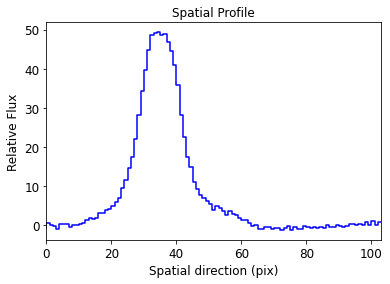


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 48, 31, 3, 4

amplitude=48.000000, x_0=31.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 47, 39,3, 4

amplitude=47.000000, x_0=39.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.86250488)>

    [1]: <Moffat1D(amplitude=37.3320865, x_0=32.99699952, gamma=6.87061134, alpha=1.69790417)>

    [2]: <Moffat1D(amplitude=31.81310691, x_0=39.07057011, ga

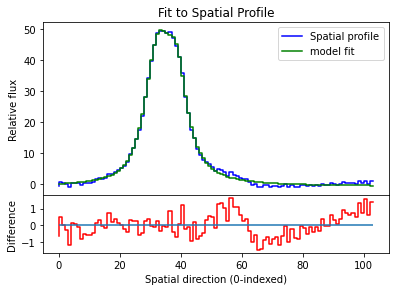

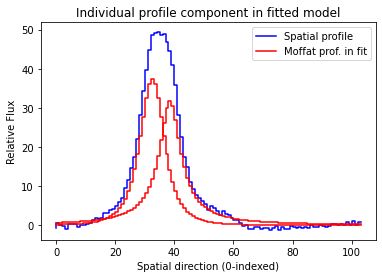


Do you want to start over ? : type yes/no
no


In [70]:
## this is for frame d0613_0075 bluer side part
profile20 = spec20.spatial_profile(pixrange=[500, 900])
plt.show()
mod20 = spec20.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.86250488)>

    [1]: <Moffat1D(amplitude=37.3320865, x_0=32.99699952, gamma=6.87061134, alpha=1.69790417)>

    [2]: <Moffat1D(amplitude=31.81310691, x_0=39.07057011, gamma=4.13852178, alpha=0.86501054)>
Parameters:
            c0_0           amplitude_1          x_0_1            gamma_1           alpha_1          amplitude_2          x_0_2            gamma_2           alpha_2      
    ------------------- ----------------- ----------------- ----------------- ------------------ ----------------- ----------------- ----------------- ------------------
    -0.8625048765709701 37.33208650161434 32.99699951806913 6.870611338247718 1.6979041739399319 31.81310691329508 39.07057010628288 4.138521780932621 0.8650105430535796

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs:

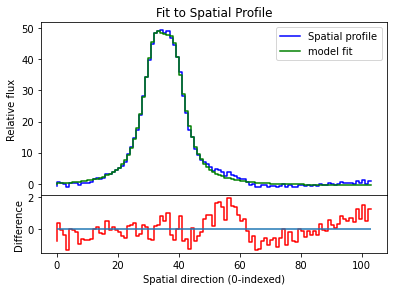

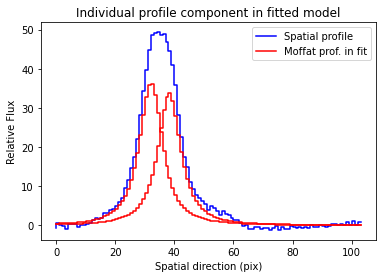

In [71]:
# this is for frame  d0613_0075 bluer side
def tie_pos1_moffat(model):
     return model.x_0_1 + (0.74/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec20.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec20.mod0[2].gamma.tied = tie_gamma_moffat
spec20.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec20.refined_model(mod20)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 58 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


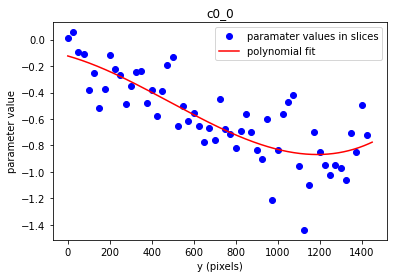

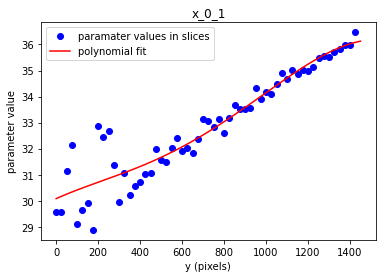

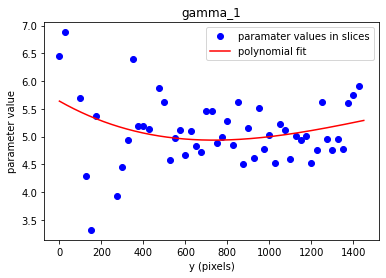

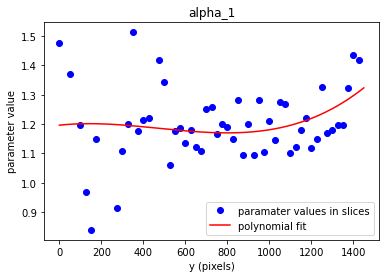

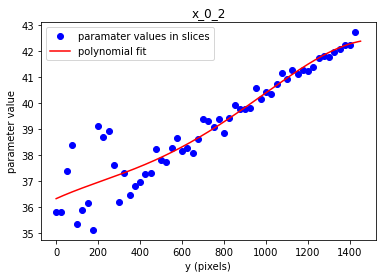

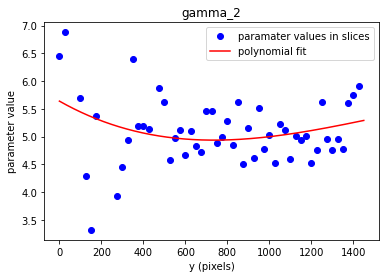

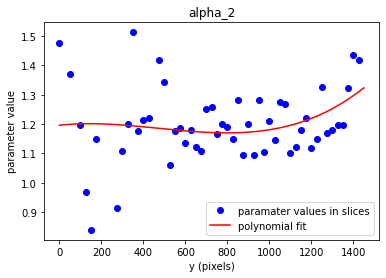

In [89]:
spec20.find_and_trace(spec20.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                    fitrange=[0, -1], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 50 - 1451
Fitting to the trace at 1451 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  4937.52
 Spectrum End:     5804.90
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62

 Spectrum Start:  4937.52
 Spectrum End:     5804.90
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62


Plotting the spectrum


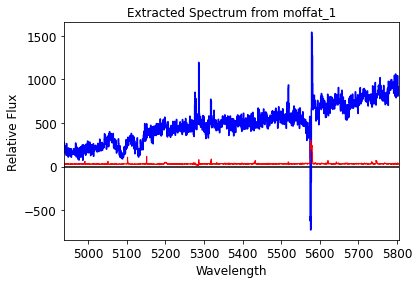

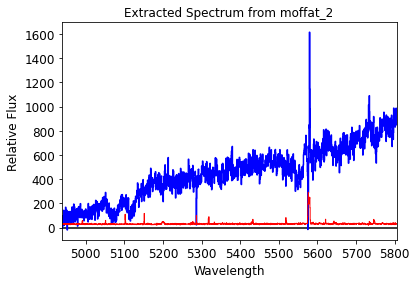

In [91]:
spec20.extract(method='modelfit', extrange=[50, -1])#[1000, -1]

In [99]:
spec20.spectra[0][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_bluer_side_deflector_1.fits',
                          outformat='fits')
spec20.spectra[1][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_bluer_side_deflector_2.fits',
                          outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_bluer_side_deflector_1.fits in format fits
Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_bluer_side_deflector_2.fits in format fits


Profile max value (before normalization) 148.803192


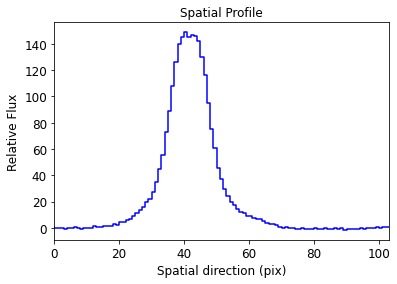


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 144, 39, 3, 4

amplitude=144.000000, x_0=39.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 143, 46, 3, 4

amplitude=143.000000, x_0=46.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.66447303)>

    [1]: <Moffat1D(amplitude=109.62333379, x_0=39.38595467, gamma=6.20396326, alpha=1.56410801)>

    [2]: <Moffat1D(amplitude=101.67477241, x_0=45.4163

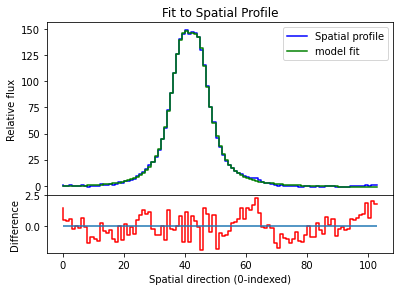

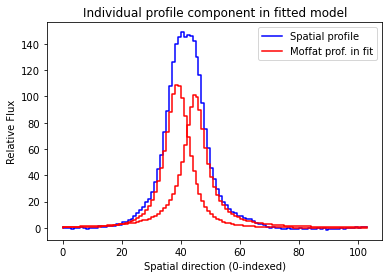


Do you want to start over ? : type yes/no
no


In [92]:
profile21 = spec21.spatial_profile(pixrange=[700, 1100])
plt.show()
mod21 = spec21.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.66447303)>

    [1]: <Moffat1D(amplitude=109.62333379, x_0=39.38595467, gamma=6.20396326, alpha=1.56410801)>

    [2]: <Moffat1D(amplitude=101.67477241, x_0=45.41635419, gamma=4.50627125, alpha=1.04252018)>
Parameters:
            c0_0           amplitude_1           x_0_1            gamma_1      ...    amplitude_2          x_0_2             gamma_2           alpha_2      
    ------------------- ------------------ ----------------- ----------------- ... ----------------- ------------------ ----------------- ------------------
    -1.6644730264964156 109.62333378610649 39.38595466878083 6.203963263923483 ... 101.6747724132806 45.416354190078685 4.506271249629792 1.0425201754522648

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set si

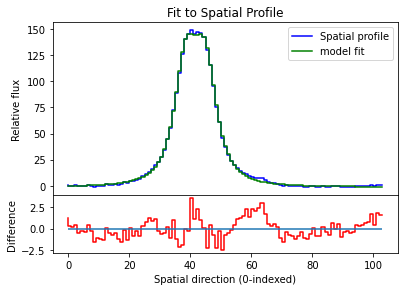

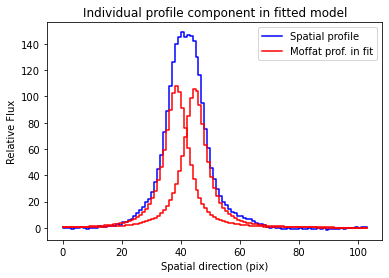

In [93]:
# this is for frame  d0613_0075 redder side
def tie_pos1_moffat(model):
     return model.x_0_1 + (0.74/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec21.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec21.mod0[2].gamma.tied = tie_gamma_moffat
spec21.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec21.refined_model(mod21)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 111 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


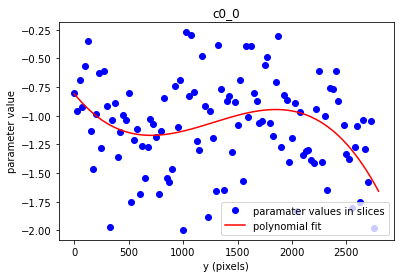

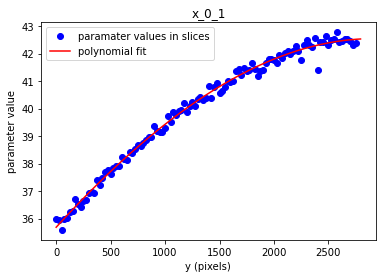

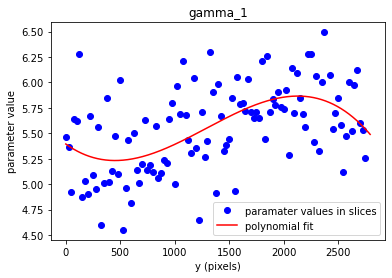

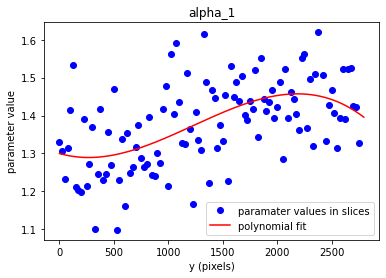

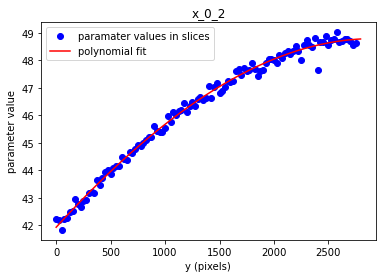

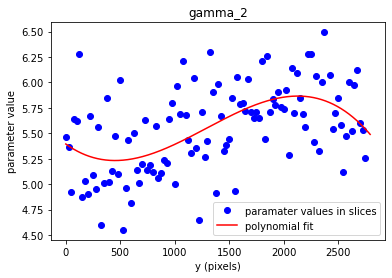

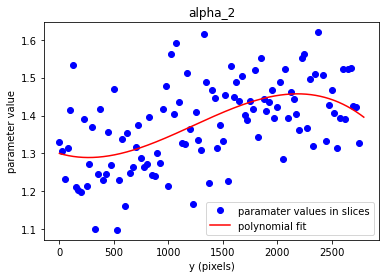

In [94]:
spec21.find_and_trace(spec21.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                    fitrange=[0, -1], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 50 - 2796
Fitting to the trace at 2796 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5740.05
 Spectrum End:     7496.35
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.64

 Spectrum Start:  5740.05
 Spectrum End:     7496.35
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.64


Plotting the spectrum


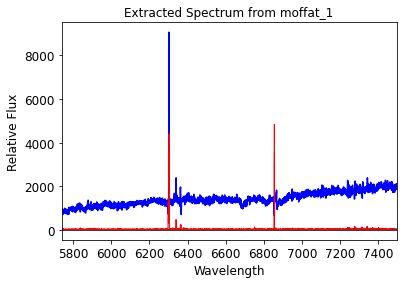

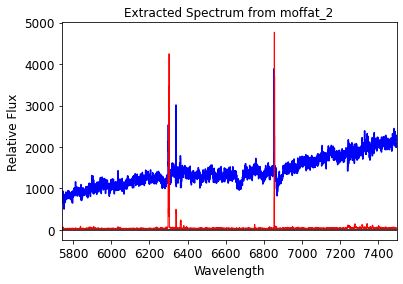

In [95]:
spec21.extract(method='modelfit', extrange=[50, -1])#[1000, -1]

In [98]:
spec21.spectra[0][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_redder_side_deflector_1.fits',
                          outformat='fits')
spec21.spectra[1][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_redder_side_deflector_2.fits',
                          outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_redder_side_deflector_1.fits in format fits
Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_redder_side_deflector_2.fits in format fits


(-50.0, 4000.0)

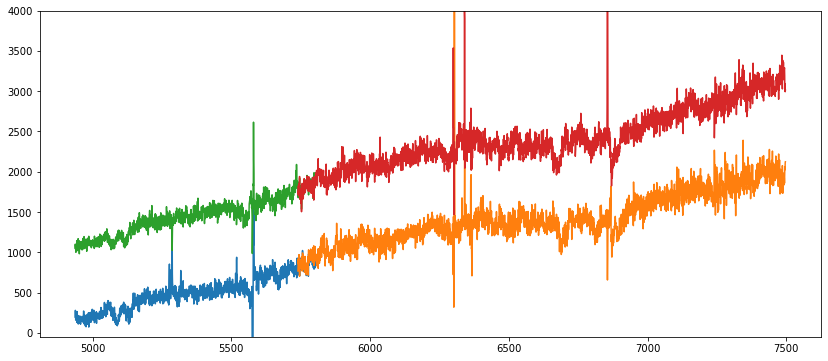

In [97]:
plt.figure(figsize=(14, 6))
plt.plot(spec20.spectra[0][1]['wav'], spec20.spectra[0][1]['flux'])
plt.plot(spec21.spectra[0][1]['wav'], spec21.spectra[0][1]['flux'])
plt.plot(spec20.spectra[1][1]['wav'], spec20.spectra[1][1]['flux']+1000)
plt.plot(spec21.spectra[1][1]['wav'], spec21.spectra[1][1]['flux']+1000)
plt.ylim(-50, 4000)

In [100]:
spec21.spectra[0][0], spec21.spectra[1][0]

('Extracted Spectrum from moffat_1', 'Extracted Spectrum from moffat_2')

In [101]:
spec30 = spec2d.Spec2d(spec2d_det2[2], hext=1, varext=2, ytrim=[0, 1450])
spec31 = spec2d.Spec2d(spec2d_det2[2], hext=1, varext=2, ytrim=[1300, 4096])


Loading file 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0614_0075_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0614_0075_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:104.  yrange: 0:1451
Final data dimensions (x y): 104 x 1451

Dispersion axis:              x
N_pixels along dispersion axis: 104


Loading file 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0614_0075_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from 2M1310_DEIMOS_spectra/2M1310_deimos_det2_d0614_0075_clean.fits (HDU=1)
The input dataset was trimmed
 xrange: 0:104.  yrange: 1300:4097
Final data dimensions (x y): 104 x 2796

Dispersion axis:              x
N_pixels along dispersion axis: 104



In [102]:
spec30.set_dispaxis('y')
spec31.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 1451



Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 2796




Dispersion : 0.620000
Found 3127 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image
Dispersion : 0.640000
Found 3075 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


<Figure size 432x288 with 0 Axes>

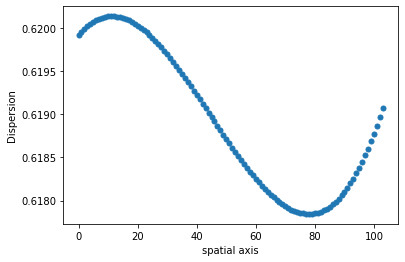

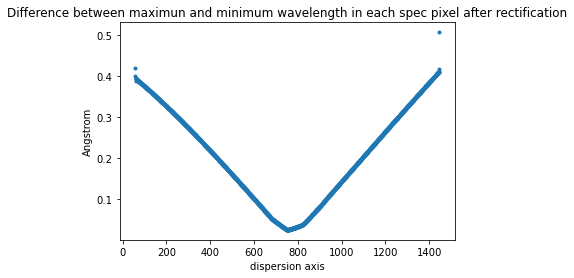

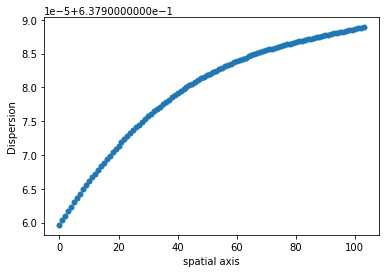

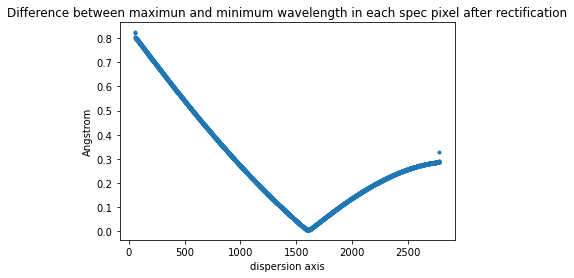

<Figure size 432x288 with 0 Axes>

In [104]:
spec30.do_waverect(doplot=True, resamp_ord=3)
plt.figure()
spec31.do_waverect(doplot=True, resamp_ord=3)
plt.figure()

Profile max value (before normalization) 49.117264


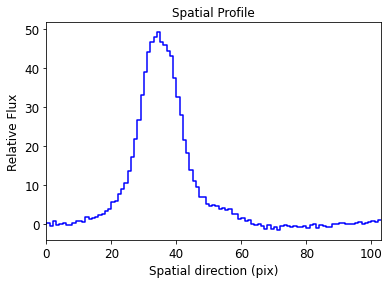


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 48, 35, 3, 4

amplitude=48.000000, x_0=35.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 42, 42, 3, 4

amplitude=42.000000, x_0=42.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.6822597)>

    [1]: <Moffat1D(amplitude=37.04975433, x_0=33.11487208, gamma=7.056051, alpha=1.73945025)>

    [2]: <Moffat1D(amplitude=28.32537355, x_0=39.13300667, gam

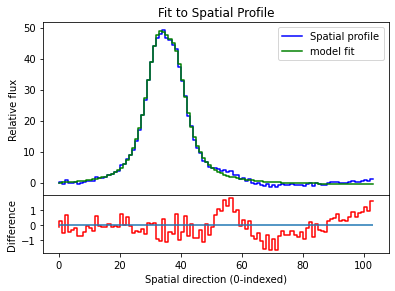

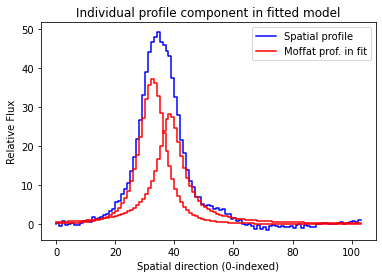


Do you want to start over ? : type yes/no
no


In [105]:
# this is for frame d0614_0075 bluer side
profile30 = spec30.spatial_profile(pixrange=[500, 900])
plt.show()
mod30 = spec30.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.6822597)>

    [1]: <Moffat1D(amplitude=37.04975433, x_0=33.11487208, gamma=7.056051, alpha=1.73945025)>

    [2]: <Moffat1D(amplitude=28.32537355, x_0=39.13300667, gamma=4.68806985, alpha=0.93666821)>
Parameters:
           c0_0           amplitude_1           x_0_1             gamma_1      ...    amplitude_2           x_0_2            gamma_2           alpha_2      
    ------------------ ------------------ ------------------ ----------------- ... ------------------ ----------------- ----------------- ------------------
    -0.682259702247065 37.049754326807474 33.114872082752875 7.056050998257162 ... 28.325373553052415 39.13300666792109 4.688069850496082 0.9366682087308685

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1

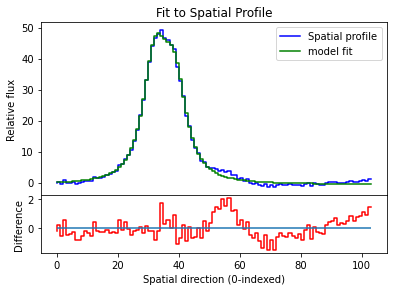

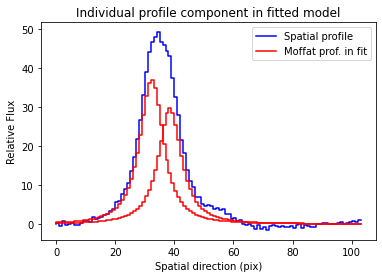

In [106]:
# this is for frame d0614_0075 bluer side
def tie_pos1_moffat(model):
     return model.x_0_1 + (0.74/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec30.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec30.mod0[2].gamma.tied = tie_gamma_moffat
spec30.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec30.refined_model(mod30)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 72 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


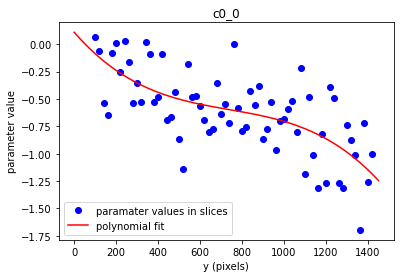

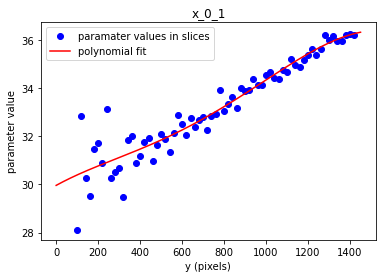

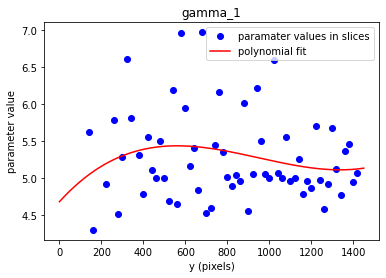

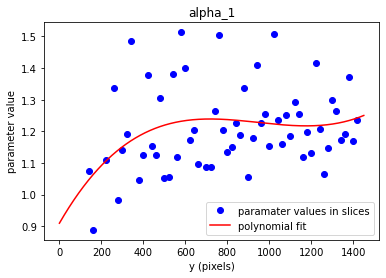

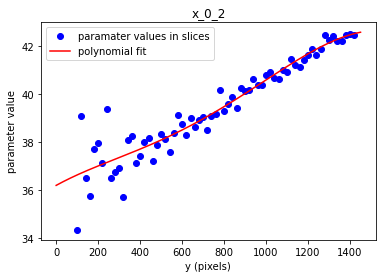

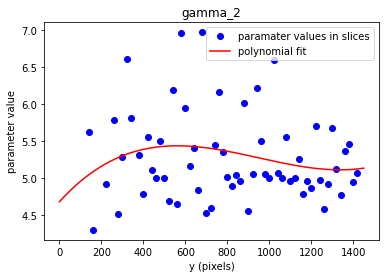

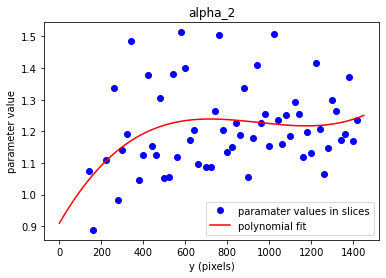

In [113]:
spec30.find_and_trace(spec30.mod0, stepsize=20, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                    fitrange=[100, -1], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 100 - 1451
Fitting to the trace at 1451 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  4966.56
 Spectrum End:     5803.08
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62

 Spectrum Start:  4966.56
 Spectrum End:     5803.08
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62


Plotting the spectrum


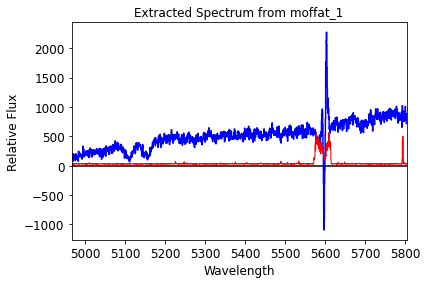

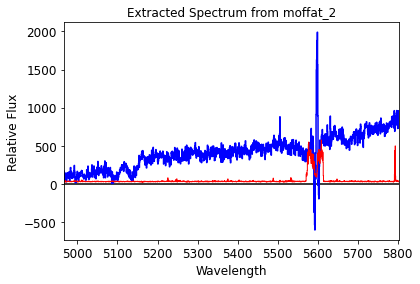

In [115]:
spec30.extract(method='modelfit', extrange=[100, -1])#[1000, -1]

In [123]:
spec30.spectra[0][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_bluer_side_deflector_1.fits',
                          outformat='fits')
spec30.spectra[1][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_bluer_side_deflector_2.fits',
                          outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_bluer_side_deflector_1.fits in format fits
Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_bluer_side_deflector_2.fits in format fits


Profile max value (before normalization) 151.250854


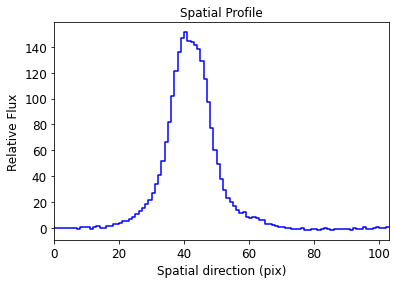


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 144, 40, 3, 4

amplitude=144.000000, x_0=40.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 140, 47, 3, 4

amplitude=140.000000, x_0=47.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.83153277)>

    [1]: <Moffat1D(amplitude=118.72063477, x_0=39.92292051, gamma=6.04926446, alpha=1.45128451)>

    [2]: <Moffat1D(amplitude=89.01438206, x_0=45.90270

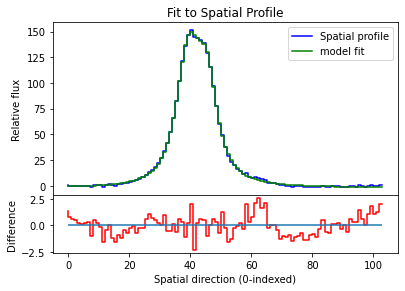

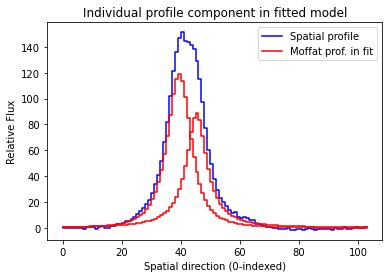


Do you want to start over ? : type yes/no
no


In [116]:
# this is for frame d0614_0075 redder side
profile31 = spec31.spatial_profile(pixrange=[700, 1100])
plt.show()
mod31 = spec31.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.83153277)>

    [1]: <Moffat1D(amplitude=118.72063477, x_0=39.92292051, gamma=6.04926446, alpha=1.45128451)>

    [2]: <Moffat1D(amplitude=89.01438206, x_0=45.90270688, gamma=4.2535888, alpha=1.02102075)>
Parameters:
            c0_0           amplitude_1           x_0_1            gamma_1      ...    amplitude_2          x_0_2            gamma_2           alpha_2      
    ------------------- ------------------ ----------------- ----------------- ... ----------------- ----------------- ----------------- ------------------
    -1.8315327727570327 118.72063477323893 39.92292050643214 6.049264456263931 ... 89.01438205953076 45.90270688252954 4.253588796198742 1.0210207489677805

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1

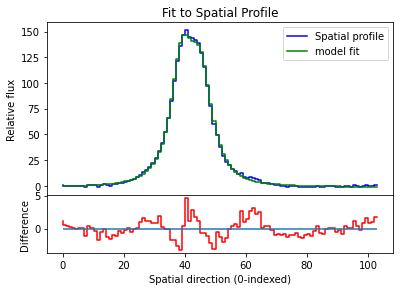

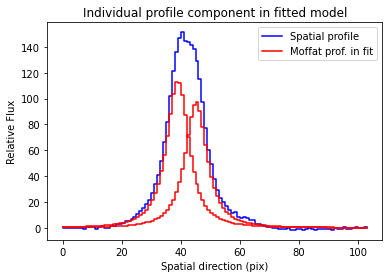

In [117]:
# this is for frame d0614_0075 redder side
def tie_pos1_moffat(model):
     return model.x_0_1 + (0.74/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 - (1.70/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec31.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec31.mod0[2].gamma.tied = tie_gamma_moffat
spec31.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[1].gamma.tied = tie_gamma_moffat
#spec.mod0[1].alpha.tied = tie_alpha_moffat
spec31.refined_model(mod31)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 139 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


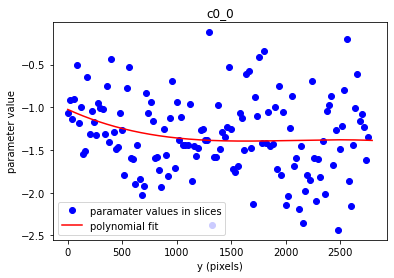

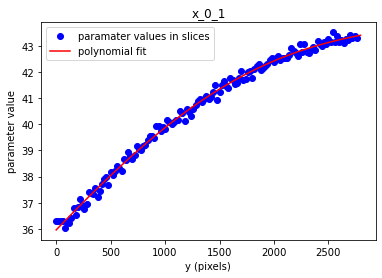

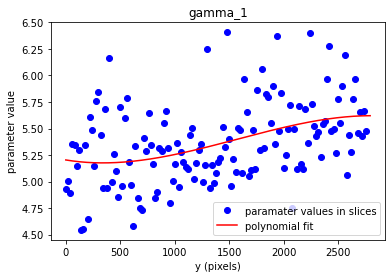

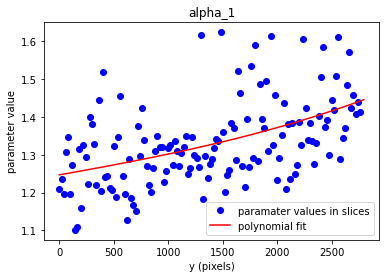

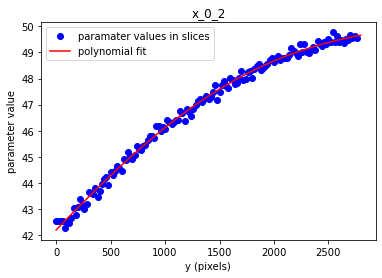

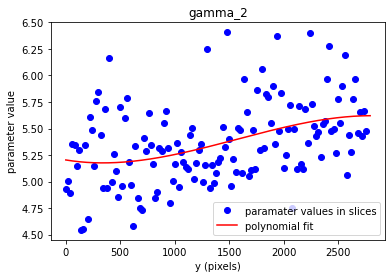

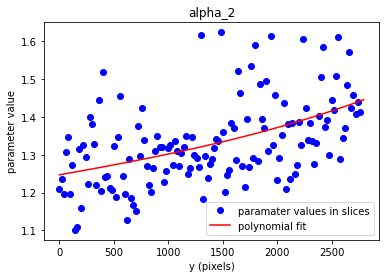

In [118]:
spec31.find_and_trace(spec31.mod0, stepsize=20, fitorder={'x_0_1':4, 'x_0_2':4, 'mean_1':4},
                    fitrange=[0, -1], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 80 - 2796
Fitting to the trace at 2796 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5759.33
 Spectrum End:     7496.44
 Dispersion (1st pixel):   0.64
 Dispersion (average):      0.64

 Spectrum Start:  5759.33
 Spectrum End:     7496.44
 Dispersion (1st pixel):   0.64
 Dispersion (average):      0.64


Plotting the spectrum


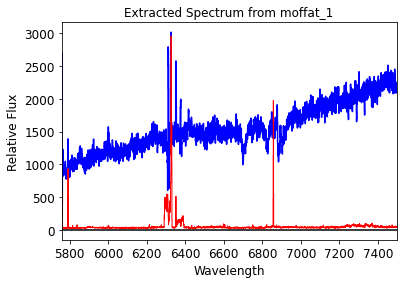

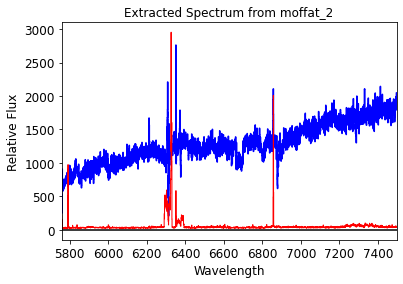

In [120]:
spec31.extract(method='modelfit', extrange=[80, -1])#[1000, -1]

In [122]:
spec31.spectra[0][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_redder_side_deflector_1.fits',
                          outformat='fits')
spec31.spectra[1][1].save('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_redder_side_deflector_2.fits',
                          outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_redder_side_deflector_1.fits in format fits
Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_redder_side_deflector_2.fits in format fits


(-50.0, 4000.0)

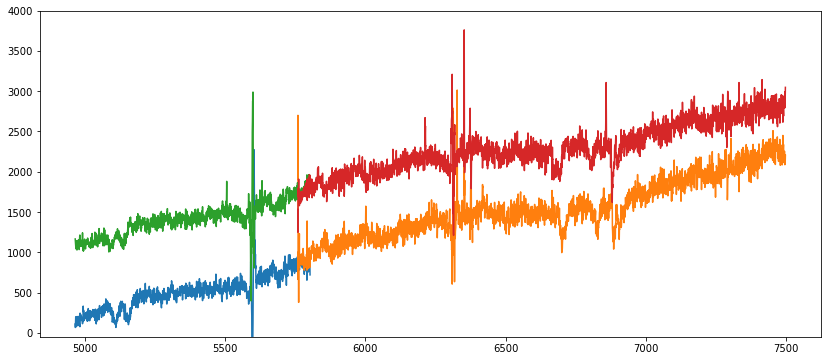

In [121]:
plt.figure(figsize=(14, 6))
plt.plot(spec30.spectra[0][1]['wav'], spec30.spectra[0][1]['flux'])
plt.plot(spec31.spectra[0][1]['wav'], spec31.spectra[0][1]['flux'])
plt.plot(spec30.spectra[1][1]['wav'], spec30.spectra[1][1]['flux']+1000)
plt.plot(spec31.spectra[1][1]['wav'], spec31.spectra[1][1]['flux']+1000)
plt.ylim(-50, 4000)

### Combine the 1D spectra  extracted from the three frames

In [2]:
sp10_d1 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_1.fits', 
                        informat='fits')
sp11_d1 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_1.fits',
                       informat='fits')

sp10_d2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_2.fits',
                        informat='fits')
sp11_d2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_2.fits',
                       informat='fits')

sp20_d1 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_bluer_side_deflector_1.fits',
                       informat='fits')
sp21_d1 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_redder_side_deflector_1.fits',
                       informat='fits')

sp20_d2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_bluer_side_deflector_2.fits',
                       informat='fits')
sp21_d2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0075_redder_side_deflector_2.fits',
                       informat='fits')

sp30_d1 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_bluer_side_deflector_1.fits',
                       informat='fits')
sp31_d1 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_redder_side_deflector_1.fits',
                       informat='fits')

sp30_d2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_bluer_side_deflector_2.fits',
                       informat='fits')
sp31_d2 = spec1d.Spec1d('2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0614_0075_redder_side_deflector_2.fits',
                       informat='fits')


Reading spectrum from 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_1.fits
Expected file format: fits
 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62


Reading spectrum from 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_1.fits
Expected file format: fits
 Spectrum Start:  5739.98
 Spectrum End:     7496.29
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.64


Reading spectrum from 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_bluer_side_deflector_2.fits
Expected file format: fits
 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62


Reading spectrum from 2M1310_DEIMOS_spectra/spec1d_2M1310_frame_d0613_0074_redder_side_deflector_2.fits
Expected file format: fits
 Spectrum Start:  5739.98
 Spectrum End:     7496.29
 Dispersion (1st pixel):   0.65
 Dispersion (average):      0.64

### response correct the extracted spectra and save

In [3]:
response_curve_13_06_2021 = spec1d.Spec1d('standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt')
response_curve_14_06_2021 = spec1d.Spec1d('standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt')


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt
Expected file format: text
 Spectrum Start:  4544.97
 Spectrum End:     7124.78
 Dispersion (1st pixel):   0.56
 Dispersion (average):      0.63



In [4]:
spec_list1 = [sp10_d1, sp11_d1, sp10_d2, sp11_d2, sp20_d1, sp21_d1, sp20_d2, sp21_d2]
spec_list2 = [sp30_d1, sp31_d1, sp30_d2, sp31_d2]


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


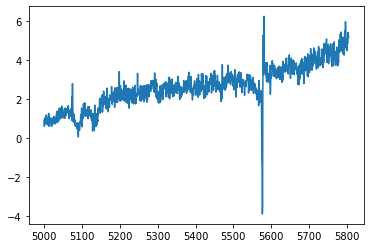

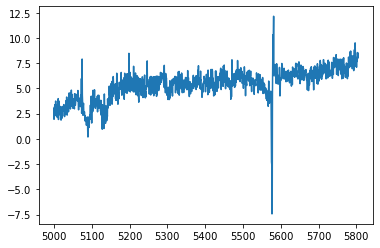


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


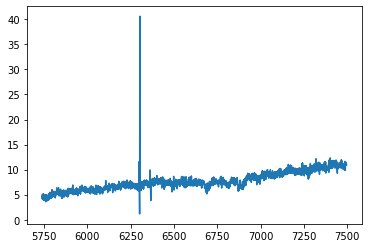

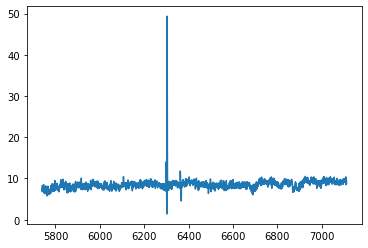


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


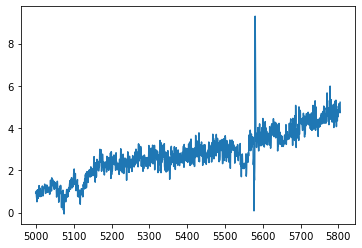

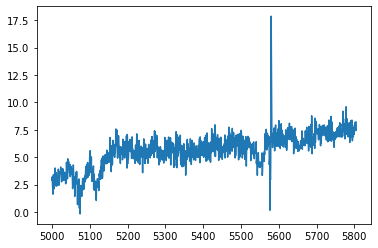


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


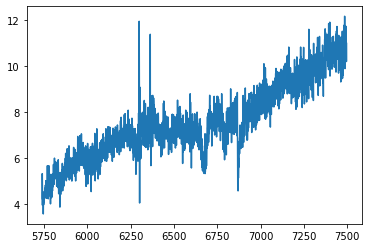

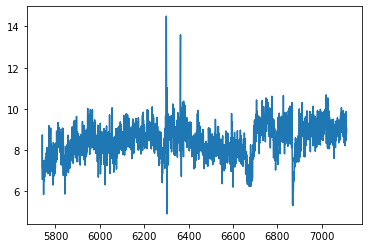


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


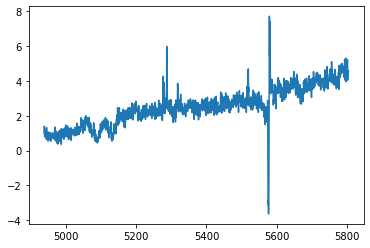

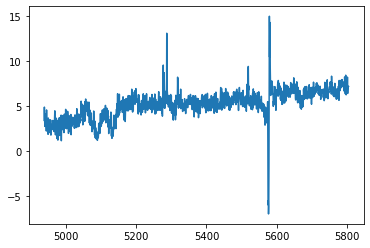


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


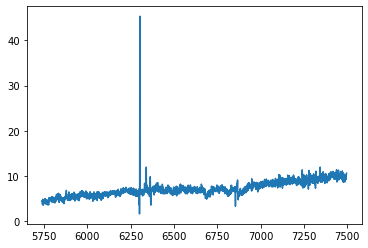

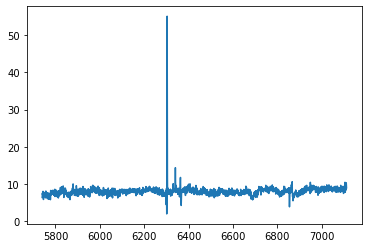


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


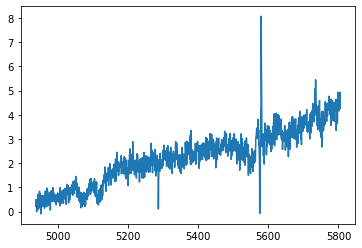

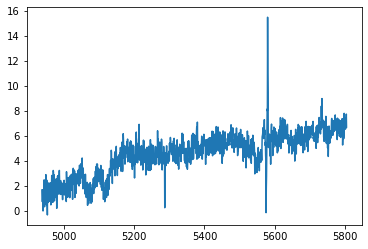


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt
Expected file format: text
 Spectrum Start:  4544.85
 Spectrum End:     7124.66
 Dispersion (1st pixel):   0.57
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


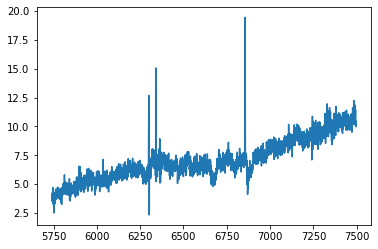

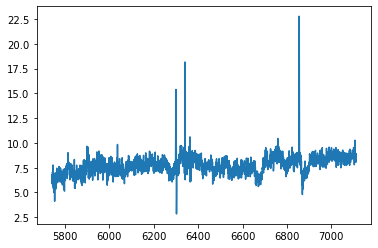

In [5]:
i=0
for sp in spec_list1:
    rs_curve = spec1d.Spec1d('standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June13_2021.txt')
    rs_curve.resample(owave=sp['wav'])
    #m = rs_curve.rswav <=7120
    plt.plot(sp['wav'], sp['flux']/200)
    plt.show()
    sp.resp_corr(rs_curve.rsflux, mode='input', action='divide')
    if i%2:
        plt.plot(sp['wav'][:-600], sp['flux'][:-600])
    else:
        plt.plot(sp['wav'], sp['flux'])
    plt.show()
    i +=1


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt
Expected file format: text
 Spectrum Start:  4544.97
 Spectrum End:     7124.78
 Dispersion (1st pixel):   0.56
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


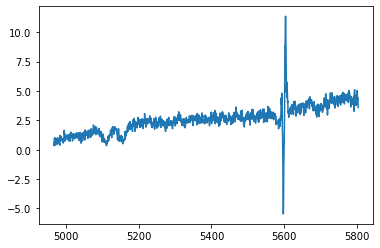

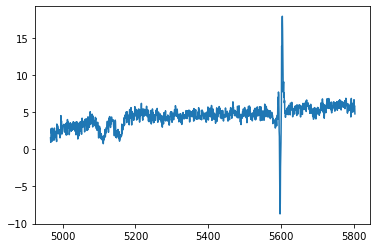


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt
Expected file format: text
 Spectrum Start:  4544.97
 Spectrum End:     7124.78
 Dispersion (1st pixel):   0.56
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


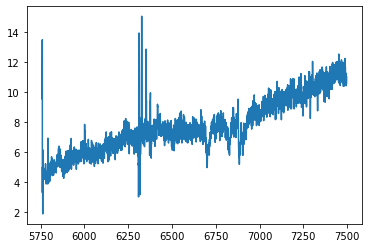

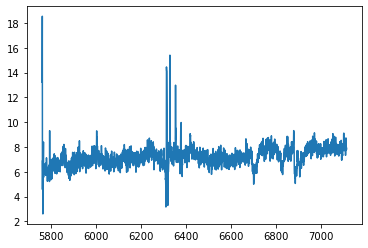


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt
Expected file format: text
 Spectrum Start:  4544.97
 Spectrum End:     7124.78
 Dispersion (1st pixel):   0.56
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


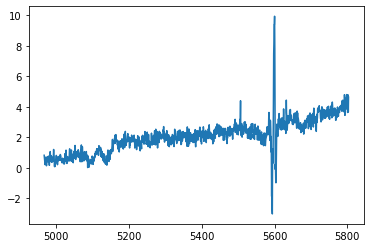

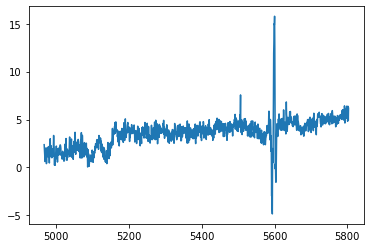


Reading spectrum from standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt
Expected file format: text
 Spectrum Start:  4544.97
 Spectrum End:     7124.78
 Dispersion (1st pixel):   0.56
 Dispersion (average):      0.63

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


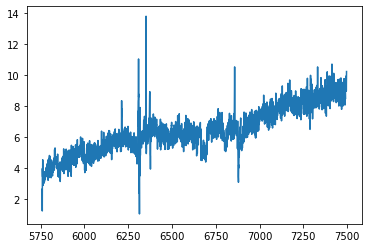

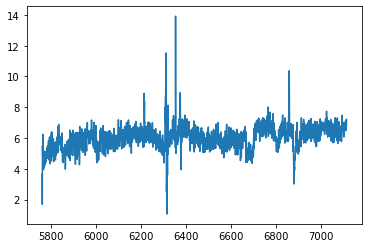

In [111]:
i=0
for sp in spec_list2:
    rs_curve = spec1d.Spec1d('standard_star_DEIMOS_2021/response_curve_DEIMOS_det3_June14_2021.txt')
    rs_curve.resample(owave=sp['wav'])
    #m = rs_curve.rswav <=7120
    plt.plot(sp['wav'], sp['flux']/200)
    plt.show()
    sp.resp_corr(rs_curve.rsflux, mode='input', action='divide')
    if i%2:
        plt.plot(sp['wav'][:-600], sp['flux'][:-600])
    else:
        plt.plot(sp['wav'], sp['flux'])
    plt.show()
    i +=1

### stitch and coadd
### ONly coadding the frames from June 13. The other frame has some error in wavelength, so not contributing rather damging the coaddition.

In [6]:
sp_list = [sp10_d1, sp11_d1, sp20_d1, sp21_d1] #, sp30_d1, sp31_d1]
w0 = 4999
w1 = 7120
disp = 0.63
outwav = np.arange(w0, w1, disp)
outflux = np.zeros((outwav.size, len(sp_list)))
outvar = outflux.copy()
for i, spec in enumerate(sp_list):
    wav = spec['wav'][spec['wav']<=7120]
    flux = spec['flux'][spec['wav']<=7120]
    var = spec['var'][spec['wav']<=7120]
    mask = (outwav >= wav[0]) & (outwav <= wav[-1])
    mod = interpolate.splrep(wav, flux, k=1)
    outflux[mask, i] = interpolate.splev(outwav[mask], mod)
    mod = interpolate.splrep(wav, var, k=1)
    outvar[mask, i] = interpolate.splev(outwav[mask], mod)    
outvar[outvar == 0.] = 1.e4
coadded_flux = np.nansum(outflux/outvar, 1) / np.nansum(1./outvar, 1)
coadded_var = np.nansum(1./outvar, 1)**-1
coadded_sp = spec1d.Spec1d(wav=outwav[:-2], flux=coadded_flux[:-2], var=coadded_var[:-2])

 Spectrum Start:  4999.00
 Spectrum End:     7118.32
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5020.72
CaII K        3933.67       5086.24
CaII H        3968.47       5131.23
H-delta       4101.00       5302.59
G-band        4305.00       5566.36
H-gamma       4340.00       5611.62
Fe4383        4383.00       5667.22
Ca4455        4455.00       5760.31
Fe4531        4531.00       5858.58
H-beta        4861.00       6285.27
Mg I (b)      5176.00       6692.57



(-5.0, 15.0)

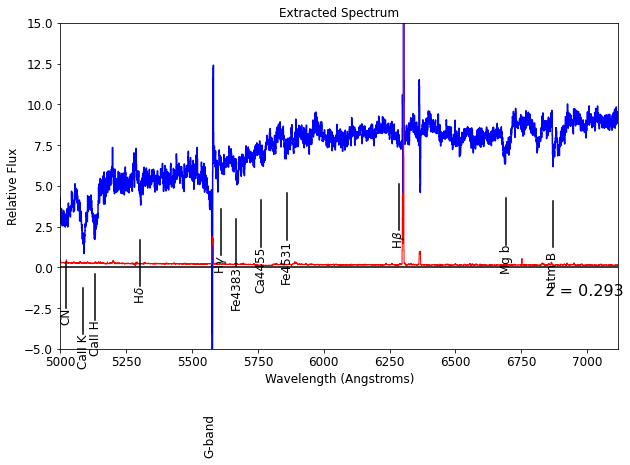

In [12]:
fg=plt.figure(figsize=(10, 6))
coadded_sp.smooth(1, fig=fg)
coadded_sp.mark_lines('abs', z=0.293, markatm=True, excludeline=['atm A'])
plt.ylim(-5, 15)

In [16]:
coadded_sp.save('2M1310_DEIMOS_spectra/spec1d_2M1310_DEIMOS_coadd1d_deflector_1.fits', outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_DEIMOS_coadd1d_deflector_1.fits in format fits


In [13]:
sp_list = [sp10_d2, sp11_d2, sp20_d2, sp21_d2]#, sp30_d2, sp31_d2]
w0 = 4999
w1 = 7120
disp = 0.63
outwav = np.arange(w0, w1, disp)
outflux = np.zeros((outwav.size, len(sp_list)))
outvar = outflux.copy()
for i, spec in enumerate(sp_list):
    wav = spec['wav'][spec['wav']<=7120]
    flux = spec['flux'][spec['wav']<=7120]
    var = spec['var'][spec['wav']<=7120]
    mask = (outwav >= wav[0]) & (outwav <= wav[-1])
    mod = interpolate.splrep(wav, flux, k=1)
    outflux[mask, i] = interpolate.splev(outwav[mask], mod)
    mod = interpolate.splrep(wav, var, k=1)
    outvar[mask, i] = interpolate.splev(outwav[mask], mod)    
outvar[outvar == 0.] = 1.e4
coadded_flux = np.nansum(outflux/outvar, 1) / np.nansum(1./outvar, 1)
coadded_var = np.nansum(1./outvar, 1)**-1
coadded_sp2 = spec1d.Spec1d(wav=outwav[:-2], flux=coadded_flux[:-2], var=coadded_var[:-2])

 Spectrum Start:  4999.00
 Spectrum End:     7118.32
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5009.07
CaII K        3933.67       5074.43
CaII H        3968.47       5119.33
H-delta       4101.00       5290.29
G-band        4305.00       5553.45
H-gamma       4340.00       5598.60
Fe4383        4383.00       5654.07
Ca4455        4455.00       5746.95
Fe4531        4531.00       5844.99
H-beta        4861.00       6270.69
Mg I (b)      5176.00       6677.04



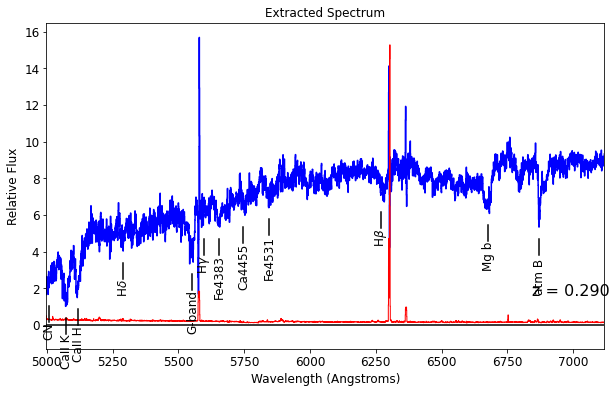

In [14]:
fg=plt.figure(figsize=(10, 6))
coadded_sp2.smooth(1, fig=fg)
coadded_sp2.mark_lines('abs', z=0.290, markatm=True, excludeline=['atm A'])

In [17]:
coadded_sp2.save('2M1310_DEIMOS_spectra/spec1d_2M1310_DEIMOS_coadd1d_deflector_2.fits', outformat='fits')

Saved spectrum to file 2M1310_DEIMOS_spectra/spec1d_2M1310_DEIMOS_coadd1d_deflector_2.fits in format fits


### Below cell shows how the third frame is not contributing while coadding.

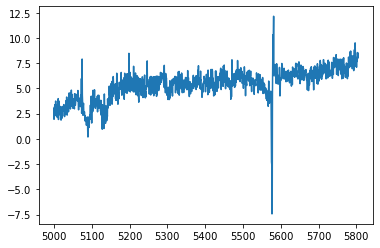

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


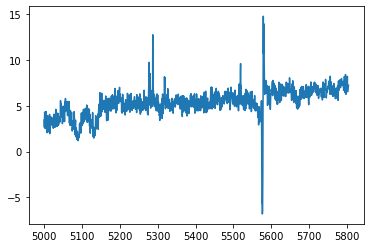

resample: replacing input spectrum with resampled version
resample: for now not resampling the variance
 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62

 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62

 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62



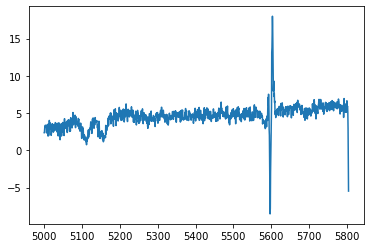

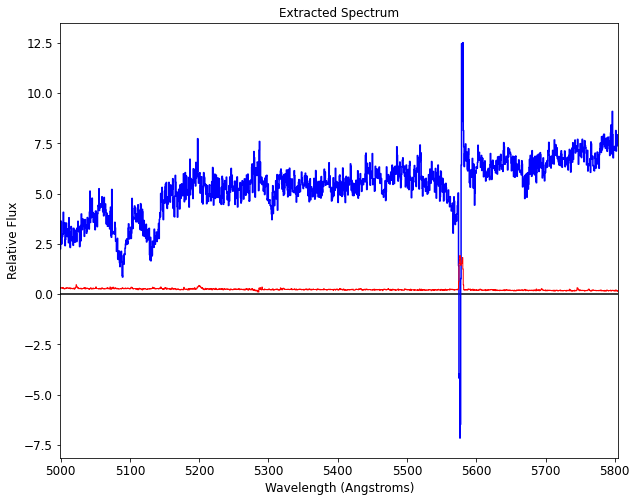

 Spectrum Start:  4999.38
 Spectrum End:     5804.84
 Dispersion (1st pixel):   0.62
 Dispersion (average):      0.62



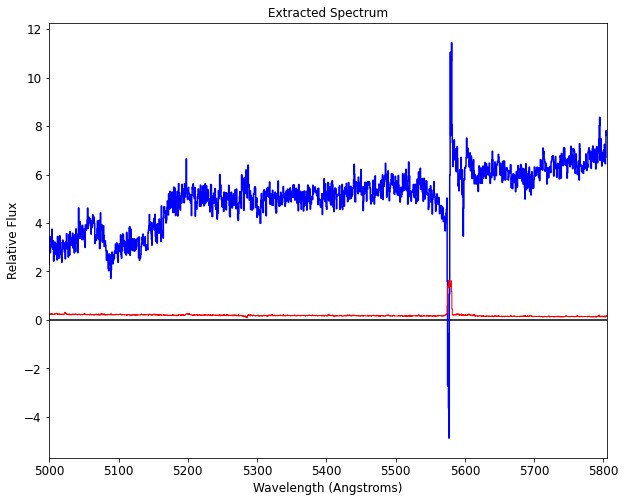

In [112]:
sp1, sp2, sp3 = sp10_d1, sp20_d1, sp30_d1

plt.plot(sp1['wav'], sp1['flux'])
plt.show()
sp2.resample(owave=sp1['wav'])
plt.plot(sp2.rswav, sp2.rsflux)
plt.show()
sp3.resample(owave=sp1['wav'])
plt.plot(sp3.rswav, sp3.rsflux)

varmod2 = interpolate.splrep(sp2['wav'], np.sqrt(sp2['var']))
varout2 = interpolate.splev(sp1['wav'], varmod2)**2

varmod3 = interpolate.splrep(sp3['wav'], np.sqrt(sp3['var']))
varout3 = interpolate.splev(sp1['wav'], varmod3)**2

sp2_resamp = spec1d.Spec1d(wav=sp2.rswav, flux=sp2.rsflux, var=varout2)
sp3_resamp = spec1d.Spec1d(wav=sp3.rswav, flux=sp3.rsflux, var=varout3)

coadded_spec = sp1.__add__(sp2_resamp)
fg=plt.figure(figsize=(10,8))
coadded_spec.plot(fig=fg)
plt.show()
coadded_spec = coadded_spec.__add__(sp3_resamp)

fg=plt.figure(figsize=(10,8))
coadded_spec.plot(fig=fg)

## Redshift check of the spectra


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5009.07
CaII K        3933.67       5074.43
CaII H        3968.47       5119.33
H-delta       4101.00       5290.29
G-band        4305.00       5553.45
H-gamma       4340.00       5598.60
Fe4383        4383.00       5654.07
Ca4455        4455.00       5746.95



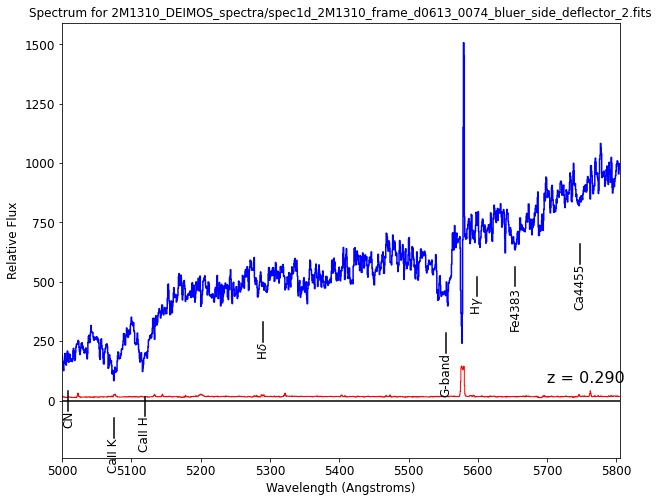

In [139]:
fg=plt.figure(figsize=(10,8))
sp10_d2.smooth(3, fig=fg)
sp10_d2.mark_lines('abs', z=0.290, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       5746.95
Fe4531        4531.00       5844.99
H-beta        4861.00       6270.69
Mg I (b)      5176.00       6677.04



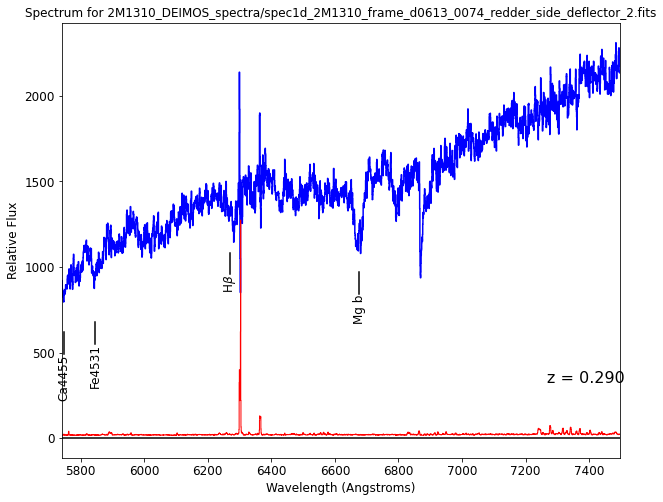

In [141]:
fg=plt.figure(figsize=(10,8))
sp11_d2.smooth(3, fig=fg)
sp11_d2.mark_lines('abs', z=0.290, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       4947.15
CN bandhd     3883.00       5009.07
CaII K        3933.67       5074.43
CaII H        3968.47       5119.33
H-delta       4101.00       5290.29
G-band        4305.00       5553.45
H-gamma       4340.00       5598.60
Fe4383        4383.00       5654.07
Ca4455        4455.00       5746.95



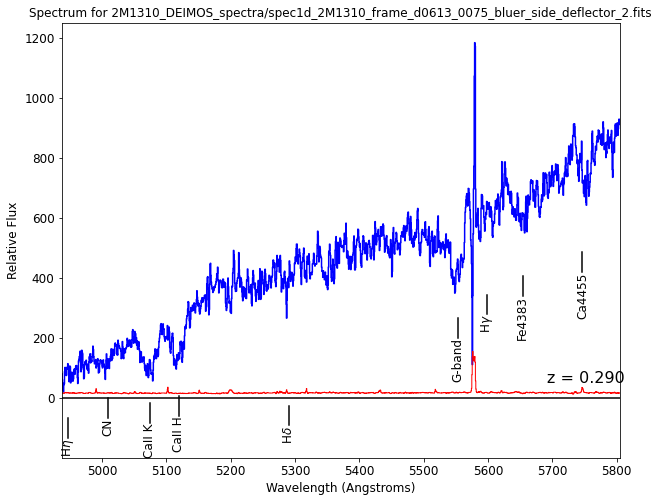

In [140]:
fg=plt.figure(figsize=(10,8))
sp20_d2.smooth(3, fig=fg)
sp20_d2.mark_lines('abs', z=0.290, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       5746.95
Fe4531        4531.00       5844.99
H-beta        4861.00       6270.69
Mg I (b)      5176.00       6677.04



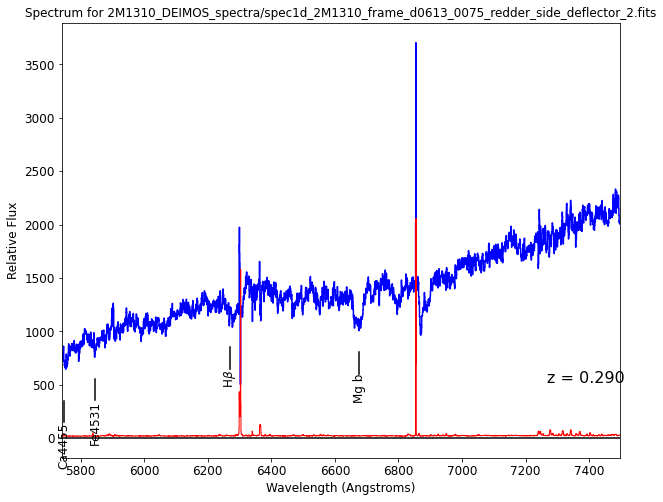

In [142]:
fg=plt.figure(figsize=(10,8))
sp21_d2.smooth(3, fig=fg)
sp21_d2.mark_lines('abs', z=0.290, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5020.72
CaII K        3933.67       5086.24
CaII H        3968.47       5131.23
H-delta       4101.00       5302.59
G-band        4305.00       5566.36
H-gamma       4340.00       5611.62
Fe4383        4383.00       5667.22
Ca4455        4455.00       5760.31



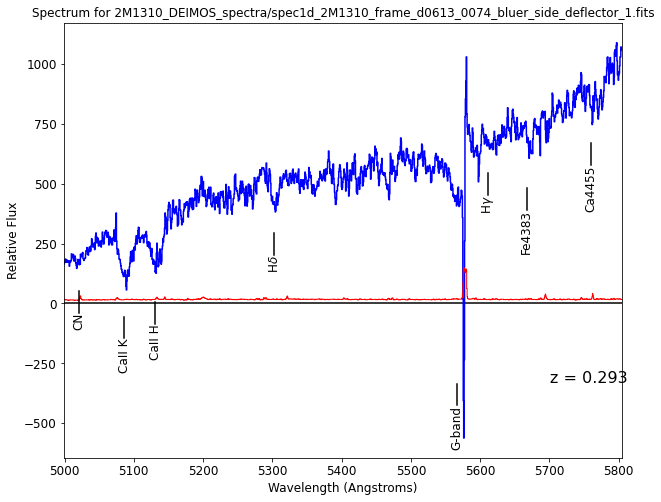

In [143]:
fg=plt.figure(figsize=(10,8))
sp10_d1.smooth(3, fig=fg)
sp10_d1.mark_lines('abs', z=0.293, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       5760.31
Fe4531        4531.00       5858.58
H-beta        4861.00       6285.27
Mg I (b)      5176.00       6692.57



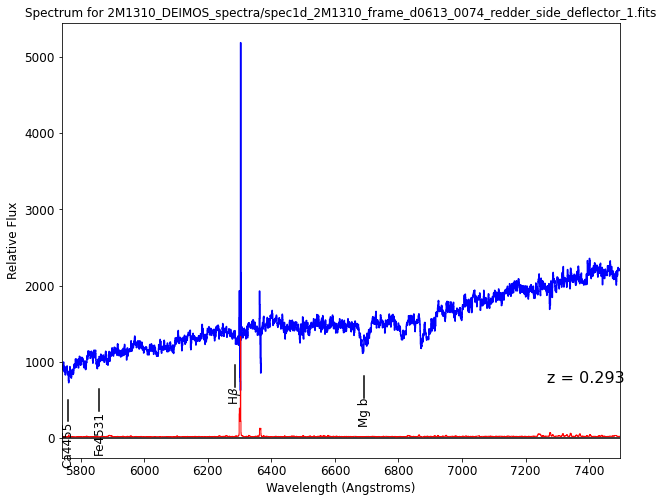

In [144]:
fg=plt.figure(figsize=(10,8))
sp11_d1.smooth(3, fig=fg)
sp11_d1.mark_lines('abs', z=0.293, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       4958.65
CN bandhd     3883.00       5020.72
CaII K        3933.67       5086.24
CaII H        3968.47       5131.23
H-delta       4101.00       5302.59
G-band        4305.00       5566.36
H-gamma       4340.00       5611.62
Fe4383        4383.00       5667.22
Ca4455        4455.00       5760.31



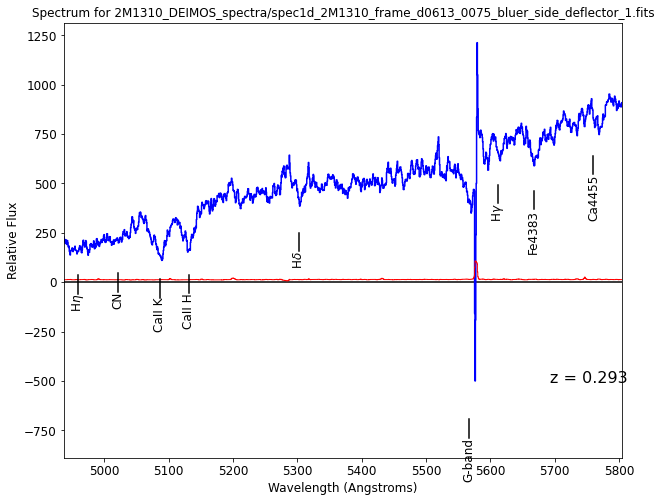

In [150]:
fg=plt.figure(figsize=(10,8))
sp20_d1.smooth(5, fig=fg)
sp20_d1.mark_lines('abs', z=0.293, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       5760.31
Fe4531        4531.00       5858.58
H-beta        4861.00       6285.27
Mg I (b)      5176.00       6692.57



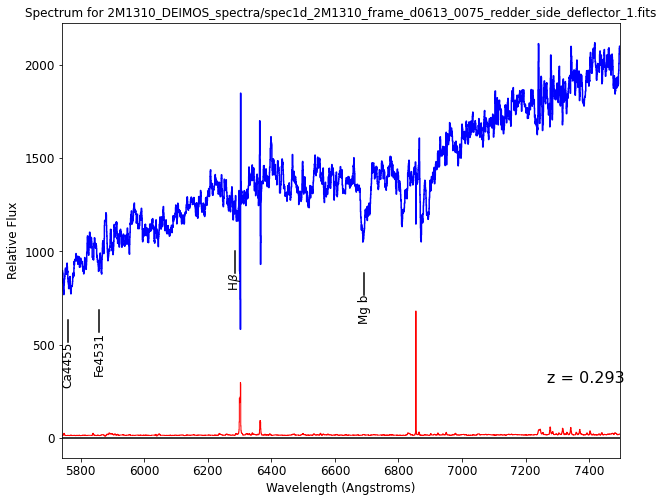

In [148]:
fg=plt.figure(figsize=(10,8))
sp21_d1.smooth(5, fig=fg)
sp21_d1.mark_lines('abs', z=0.293, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       4981.66
CN bandhd     3883.00       5044.02
CaII K        3933.67       5109.84
CaII H        3968.47       5155.04
H-delta       4101.00       5327.20
G-band        4305.00       5592.19
H-gamma       4340.00       5637.66
Fe4383        4383.00       5693.52
Ca4455        4455.00       5787.05



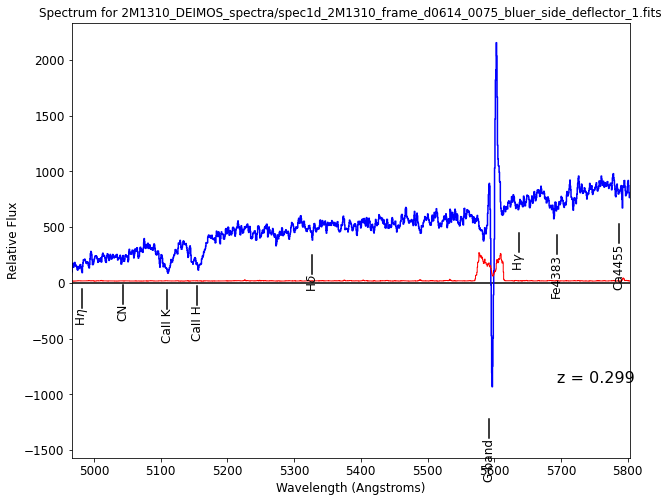

In [154]:
fg=plt.figure(figsize=(10,8))
sp30_d1.smooth(3, fig=fg)
sp30_d1.mark_lines('abs', z=0.299, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       5764.77
Fe4531        4531.00       5863.11
H-beta        4861.00       6290.13
Mg I (b)      5176.00       6697.74



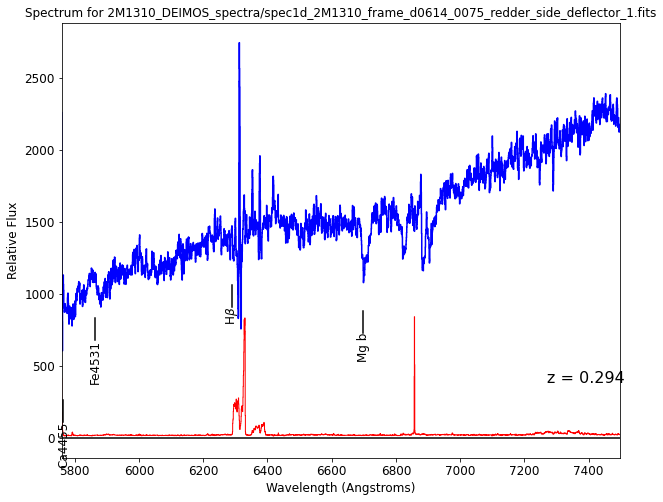

In [155]:
fg=plt.figure(figsize=(10,8))
sp31_d1.smooth(3, fig=fg)
sp31_d1.mark_lines('abs', z=0.294, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5024.60
CaII K        3933.67       5090.17
CaII H        3968.47       5135.20
H-delta       4101.00       5306.69
G-band        4305.00       5570.67
H-gamma       4340.00       5615.96
Fe4383        4383.00       5671.60
Ca4455        4455.00       5764.77



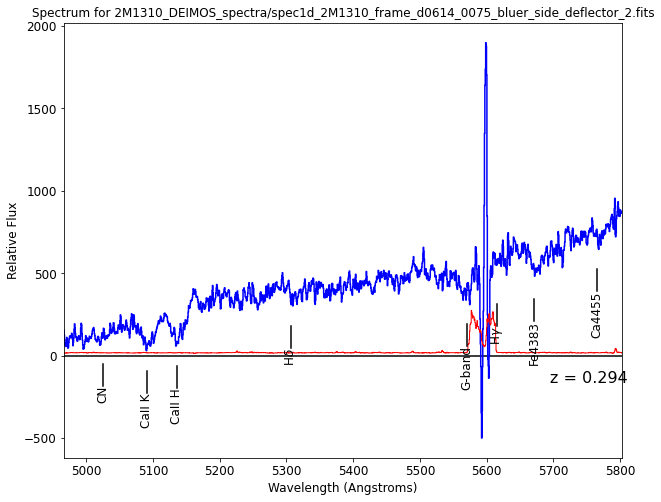

In [135]:
fg=plt.figure(figsize=(10,8))
sp30_d2.smooth(3, fig=fg)
sp30_d2.mark_lines('abs', z=0.294, markatm=True, excludeline=['atm A', 'atm B'])


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Fe4531        4531.00       5854.05
H-beta        4861.00       6280.41
Mg I (b)      5176.00       6687.39



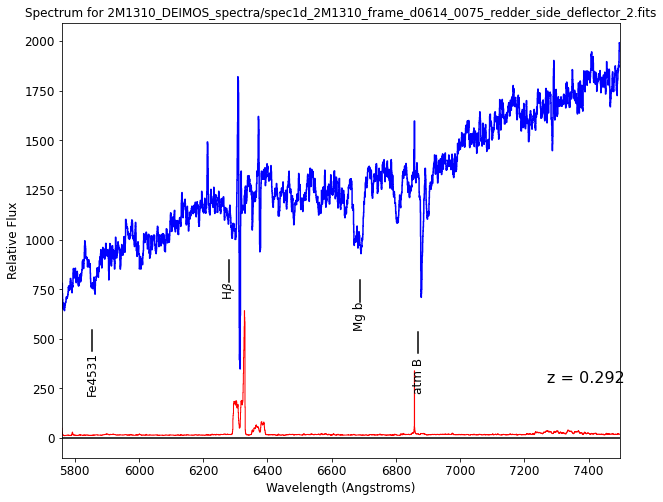

In [151]:
fg=plt.figure(figsize=(10,8))
sp31_d2.smooth(5, fig=fg)
sp31_d2.mark_lines('abs', z=0.292, markatm=True, excludeline=['atm A'])

 Spectrum Start:  4969.72
 Spectrum End:     7484.68
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5020.72
CaII K        3933.67       5086.24
CaII H        3968.47       5131.23
H-delta       4101.00       5302.59
G-band        4305.00       5566.36
H-gamma       4340.00       5611.62
Fe4383        4383.00       5667.22
Ca4455        4455.00       5760.31
Fe4531        4531.00       5858.58
H-beta        4861.00       6285.27
Mg I (b)      5176.00       6692.57



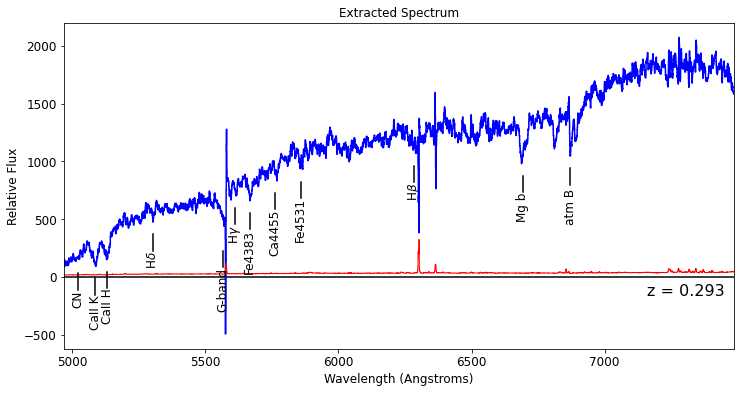

In [46]:
spec_d1 = spec1d.Spec1d(wav=spec.spectra[0][1]['wav'], flux=spec.spectra[0][1]['flux'],
                    var=spec.spectra[0][1]['var'], trimsec=[100, -1])

fg = plt.figure(figsize=(12, 6))
spec_d1.smooth(5, fig=fg)
spec_d1.mark_lines('abs', z=0.293, usesmooth=True, markatm=True, excludeline=['atm A'])

 Spectrum Start:  5756.60
 Spectrum End:     7485.31
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       5760.31
Fe4531        4531.00       5858.58
H-beta        4861.00       6285.27
Mg I (b)      5176.00       6692.57



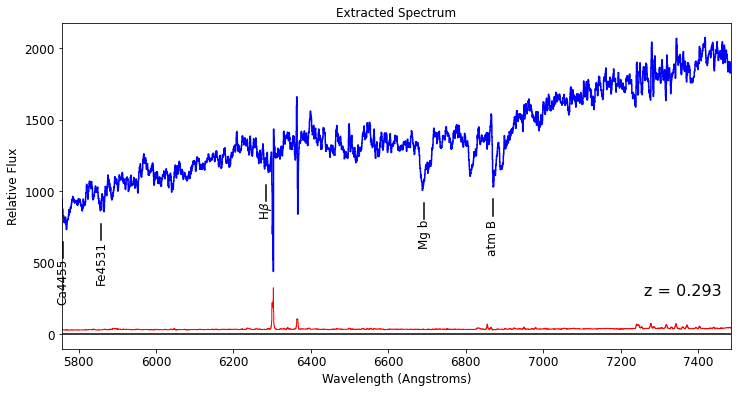

In [13]:
spec_d1 = spec1d.Spec1d(wav=spec.spectra[0][1]['wav'], flux=spec.spectra[0][1]['flux'],
                    var=spec.spectra[0][1]['var'])

fg = plt.figure(figsize=(12, 6))
spec_d1.smooth(5, fig=fg)
spec_d1.mark_lines('abs', z=0.293, usesmooth=True, markatm=True, excludeline=['atm A'])